<a href="https://colab.research.google.com/github/Ferrariagustinpablo/Python-Machine-Learning-notebooks/blob/main/XGBoosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGBoosting for Classification

For supervised learning. Relies on labeled data.

**AUC**: Area Under the ROC curve, is the most versatile and common evaluation metric used to judge a quality of a **binary classification problem**. Higher AUC meand a more sensitive, better performing model.

When dealing with multi-class classification problem it is common to use the accuracy score (higher is better) and a look at the overall confusion matrix to evaluate quality of a model.

Supervised learning considerations:
Features must be categorical or numerical. When numerical, values should be scaled. Categorical features almost be encoded like one-hot encoding (dummies)







XGboosting is an incredibly popular machine learning library.

Speed and performance.
Core algorithm is parallelizable. Makes feasible to train models in big data.

Consistently outperforms all other single-algorithm methods in machine learning competitions.





## Code for XGBoosting for classification

In [ ]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Create arrays for the features and the target: X, y
X, y = df.iloc[:,:-1], df.iloc[:,-1]

# Create the training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBClassifier: xg_cl
# binary:logistic - use when you want probability rather than just decision.
xg_cl = xgb.XGBoostClassifier(objective='binary:logistic', n_estimators=10, seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))



## Simple DecisionTreeClassifier

Decision trees as base learners

Base learner: Individual learning algorithm in an ensemble algorithm.

XGBoost is an ensemble learning algorithm.

Individual decision trees tend to overfit. (Low bias, high variance) we need low bias and low variance.

XGBoost uses CART. Cart trees unlike common decision trees, contain in each leaf a **real-valued score**. Regardless if they are used for classification or regression.



In [ ]:
import sklearn.datasets

df = sklearn.datasets.load_breast_cancer()
df.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
X, y = df.data, df.target
print(X[:5])
print(y[:5])

In [ ]:
# Import the necessary modules
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the classifier: dt_clf_4
dt_clf_4 = DecisionTreeClassifier(max_depth=4)

# Fit the classifier to the training set
dt_clf_4.fit(X_train, y_train)

# Predict the labels of the test set: y_pred_4
y_pred_4 = dt_clf_4.predict(X_test)

# Compute the accuracy of the predictions: accuracy
accuracy = float(np.sum(y_pred_4==y_test))/y_test.shape[0]
print("accuracy:", accuracy)

accuracy: 0.9649122807017544


## XGBoosting with CV

XGBoosting is really a ensemble meta-algorithm.

The goal is to convert many weak learners into an arbirarily strong learner. A weak learning is a model that is slightly better than chance. We only need a model that is slightly more accurate than pure randomnes will be considered a weak learner.

Convert a collection of weak learner into a strong learner.

Strong learner: Any algorithm than can be tuned to achieve good performance.

How does it work: Iteratively learning a set of weak models on subsets of the data. Weighting each weak prediction according to each wek learner performance. Combine all weighted predictions to obtain a single weighted prediction.

We are also going to use Cross-Validation. CV is a robust method for estimating the expected performance of a ML model on unseen data, by generating many non-overlapping train/test splits and reporting the averate test set performance across all data splits.





### XGB CV of accuracy (error)

In [ ]:

# We have to create a matrix if we are going to use cross validation object of XGB
# Create the DMatrix from X and y: churn_dmatrix
df_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:logistic", "max_depth":3}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=df_dmatrix, params=params, 
                    nfold=5, num_boost_round=5, 
                    metrics="error", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the accuracy
print('CV Accuracy score for binary classification problem Brest Cancer:',(1-cv_results["test-error-mean"]).iloc[-1])

   train-error-mean  train-error-std  test-error-mean  test-error-std
0          0.030759         0.005573         0.079165        0.032645
1          0.022409         0.004267         0.065083        0.021454
2          0.017578         0.005566         0.061559        0.019432
3          0.013183         0.004819         0.051017        0.022643
4          0.011864         0.001765         0.049263        0.020664
CV Accuracy score for binary classification problem Brest Cancer: 0.9507372000000001


### XGB CV of AUC. (The best for binary classification.

In [ ]:
# Create the parameter dictionary: params
params = {"objective":"reg:logistic", "max_depth":3}

# Perform cross_validation: cv_results
cv_results = xgb.cv(dtrain=df_dmatrix, params=params, 
                    nfold=3, num_boost_round=5, 
                    metrics="auc", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.987225       0.001301       0.961473      0.024760
1        0.993244       0.004295       0.969078      0.022616
2        0.995224       0.003751       0.972491      0.024377
3        0.997125       0.002042       0.971354      0.025405
4        0.997610       0.001871       0.974002      0.026527
0.9740019999999999


## When to use XGBoosting in classification

When I should or shouldn't use XGBoosting. 
For any Machine Learning model that fits the following criteria:

1- You have a large number of training samples. >1000 samples, < 100 features
2- The number of features < number of training samples.
3- Mixture of categorical and numeric features or just numeric features.

NOT USE XGB:

1- Not ideally suited for image recognition, Computer Vision or NLP.
(More suitable using deep learning models)
2- Small training set or the number of features > number of training samples.




# XGBoosting for regression

Common regression metrics: RMSE and MAE(Mean absolute error but less common)

Common regression models: Decision Trees and Linear Regression

Objective(loss) functions and base learners. Loss function match difference between our predicted model and the real one. 

Goal: Fin the smallest possible loss function.

Loss function names in xgboost:
 1- reg:linear - use for regression problems

 2- reg:logistic - use for classification problems if you want only a decision not a probability.

 3- binary:logistic - use when you want probability rather than just decision.

Xgboost want base learners that when combined create final prediction that is non-linear
Each base learner should be good at distinguishing or predicting different parts of the datasets (slightly better than randomness). All predictions combined, bad predictions cancel out and become one very good prediction.

Two kinds of base learners: Decision Trees and Linear Regression.




## XGboosting with Trees for regression

In [ ]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Import Boston Dataset in datasets of sklearn
load_boston = datasets.load_boston()
X, y = load_boston.data, load_boston.target

# Create the training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective="reg:linear", n_estimators=10, seed=123)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

[16:52:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 9.749041


## XGBoosting Linear Regression

In [ ]:
# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test =  xgb.DMatrix(data=X_test, label=y_test)

# Create the parameter dictionary: params
params = {"booster":"gblinear", "objective":"reg:linear"}

# Train the model: xg_reg
xg_reg = xgb.train(params = params, dtrain=DM_train, num_boost_round=5)

# Predict the labels of the test set: preds
preds = xg_reg.predict(DM_test)

# Compute and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))


[16:56:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 6.631172


### Evaluate regressor model with Cross-validation

### RMSE

In [ ]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final round boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

[16:58:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:58:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:58:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:58:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0        17.120438        0.057830       17.151866       0.295723
1        12.353698        0.034427       12.510376       0.372386
2         9.017977        0.038795        9.245965       0.314345
3         6.690101        0.047236        7.060159       0.317659
4         5.069411        0.048644        5.571861       0.252100
4    5.571861
Name: test-rmse-mean, dtype: float64


### MAE

In [ ]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics="mae", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final round boosting round metric
print((cv_results["test-mae-mean"]).tail(1))

[17:00:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
   train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0       15.584812       0.087903      15.567934      0.345122
1       11.036514       0.069404      11.044831      0.347553
2        7.827224       0.052691       7.886081      0.315104
3        5.596108       0.044331       5.718952      0.288004
4        4.062843       0.052193       4.285985      0.175467
4    4.285985
Name: test-mae-mean, dtype: float64


# Regularization in XGBoost

Regularization is a control on model complexity
Want models that are both accurate and as simple as possible.

Gamma: a parameter for tree based learners.

Alpha or L1: regularization on leaf weights (rather than on feature weights), larger values mean more regularization. In linear or logisticRegression.

Lambda or L2: Much smoother penalty than L1. Causes the leaf weights to smoothly decrease instead of enforcing strong sparsity constraints on the leaf weights as L1.



In [ ]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

reg_params = [1, 10, 100]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:linear","max_depth":3}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg
    
    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2","rmse"]))



[19:34:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:34:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:34:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:34:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:34:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:34:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best rmse as a function of l2:
    l2       rmse
0    1   6.022222
1   10   7.201520
2  100  10.692149


# Plot Tree function

XGBoost has a plot_tree() function that makes this type of visualization easy. Once you train a model using the XGBoost learning API, you can pass it to the plot_tree() function along with the number of trees you want to plot using the num_trees argument.

[19:34:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


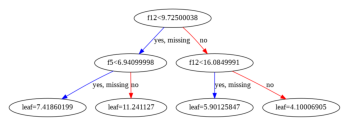

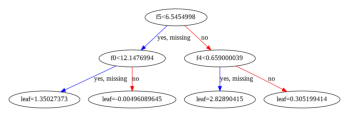

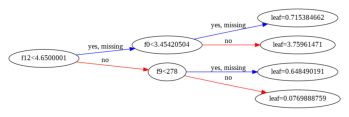

In [ ]:
import matplotlib.pyplot as plt

# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":2}

# Train the model: xg_reg. # 10 boosting trees
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the first tree
xgb.plot_tree(xg_reg, num_trees=0)
plt.show()

# Plot the fifth tree
xgb.plot_tree(xg_reg, num_trees=4)
plt.show()

# Plot the last (and best) tree sideways. 
# To plot it sideways you should write additional keyword argument rankdir="LR"
xgb.plot_tree(xg_reg, num_trees=9, rankdir='LR')
plt.show()

# Feature Importance

One simple way of doing this involves counting the number of times each feature is split on across all boosting rounds (trees) in the model, and then visualizing the result as a bar graph, with the features ordered according to how many times they appear. XGBoost has a plot_importance() function that allows you to do exactly this

[19:34:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


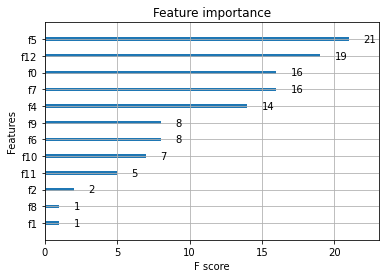

In [ ]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()

# XGB + Tuning

## Boosting rounds

Increasing number of boosting rounds. 

increasing the number of boosting rounds decreases the RMSE

In [ ]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree: params 
params = {"objective":"reg:linear", "max_depth":3}

# Create list of number of boosting rounds
num_rounds = [5, 10, 15]

# Empty list to store final round rmse per XGBoost model
final_rmse_per_round = []

# Iterate over num_rounds and build one model per num_boost_round parameter
for curr_num_rounds in num_rounds:

    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, num_boost_round=curr_num_rounds, metrics="rmse", as_pandas=True, seed=123)
    
    # Append final round RMSE
    final_rmse_per_round.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
num_rounds_rmses = list(zip(num_rounds, final_rmse_per_round))
print(pd.DataFrame(num_rounds_rmses,columns=["num_boosting_rounds","rmse"]))

[19:37:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:37:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:37:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:37:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:37:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:37:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:37:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:37:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

you can very easily have XGBoost automatically select the number of boosting rounds for you within xgb.cv(). This is done using a technique called early stopping.

Early stopping works by testing the XGBoost model after every boosting round against a hold-out dataset and stopping the creation of additional boosting rounds (thereby finishing training of the model early) if the hold-out metric ("rmse" in our case) does not improve for a given number of rounds. Here you will use the early_stopping_rounds parameter in xgb.cv() with a large possible number of boosting rounds (50). Bear in mind that if the holdout metric continuously improves up through when num_boost_rounds is reached, then early stopping does not occur.

In [ ]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary for each tree: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation with early stopping: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, num_boost_round=50, early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

[19:37:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:37:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:37:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0         17.131358        0.020615       17.223398       0.067772
1         12.382815        0.025833       12.619156       0.132110
2          9.063982        0.037021        9.505188       0.117294
3          6.726434        0.034949        7.339914       0.120753
4          5.102424        0.045690        5.954197       0.137525
5          3.976571        0.049928        5.043778       0.198929
6          3.195956        0.061089        4.436178       0.214429
7          2.694112        0.066253        4.066125       0.295735
8          2.341

## Common tree tunable parameters

1- **learning rate (eta):** Learning rate affects how quickly the model fits the residual error using additional base learners. A low learning rate will require more boosting rounds to achieve the same reduction in residual error.

2- **Gamma** (Have effect on how strongly regulatized the trained model will be)

3- **Lambda** (Have effect on how strongly regulatized the trained model will be)


4- **Alpha** (Have effect on how strongly regulatized the trained model will be)

5- **max_depth**: max depth per tree

6- **subsample**: % samples used per tree. Between 0 and 1. To low underfitting, to high overfitting.

7- **colsample_bytree**: % *features* used per tree. Between 0 and 1. To low simplifies (underfitting), to high could potentially overfit the model. It select only some features. This could be really important.

8- num_boost_round: tunable parameter of xgBoosting



## Common linear tunable parameters

1- Lambda: l2 regulatization term on weights

2- Alpha: l1 regulatization term on weights

3- ambda_bias: l2 reg term on bias

4- num_boost_round: tunable parameter of xgBoosting


### Tuning eta

In [ ]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree (boosting round)
params = {"objective":"reg:linear", "max_depth":3}

# Create list of eta values and empty list to store final round rmse per xgboost model
eta_vals = [0.001, 0.01, 0.1]
best_rmse = []

# Systematically vary the eta
for curr_val in eta_vals:

    params["eta"] = curr_val
    
    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3,
                        num_boost_round=10, early_stopping_rounds=5,
                        metrics="rmse", as_pandas=True, seed=123)
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(eta_vals, best_rmse)), columns=["eta","best_rmse"]))

[19:53:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:53:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:53:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:53:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:53:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:53:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:53:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:53:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

###  Tuning max_depth

tune max_depth, which is the parameter that dictates the maximum depth that each tree in a boosting round can grow to. Smaller values will lead to shallower trees, and larger values to deeper trees.

In [ ]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params = {"objective":"reg:linear"}

# Create list of max_depth values
max_depths = [2, 5, 10, 20]
best_rmse = []

# Systematically vary the max_depth
for curr_val in max_depths:

    params["max_depth"] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2,
                 num_boost_round=10, early_stopping_rounds=5,
                 metrics="rmse", as_pandas=True, seed=123)
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(max_depths, best_rmse)),columns=["max_depth","best_rmse"]))

[19:54:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:54:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:54:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:54:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:54:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:54:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:54:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:54:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

### Tuning colsample_bytree

You've already seen this if you've ever worked with scikit-learn's RandomForestClassifier or RandomForestRegressor, where it just was called max_features. In both xgboost and sklearn, this parameter (although named differently) simply specifies the fraction of features to choose from at every split in a given tree. In xgboost, colsample_bytree must be specified as a float between 0 and 1.

In [ ]:
# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params={"objective":"reg:linear","max_depth":5}

# Create list of hyperparameter values
colsample_bytree_vals = [0.1, 0.5, 0.8, 1]
best_rmse = []

# Systematically vary the hyperparameter value 
for curr_val in colsample_bytree_vals:

    params["colsample_bytree"] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2,
                 num_boost_round=10, early_stopping_rounds=5,
                 metrics="rmse", as_pandas=True, seed=123)
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(colsample_bytree_vals, best_rmse)), columns=["colsample_bytree","best_rmse"]))

[19:56:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

### Tuning  several hyperparameter simultaneously

GridSearch CV and RandomSearch

GridSearch searches exhaustively over a given set of hyperparameters.

Number of models = number of disctint values per hyperparameter multiplied across each hyperparameter. Ask to give the best result of all possibilities.



Now that you've learned how to tune parameters individually with XGBoost, let's take your parameter tuning to the next level by using scikit-learn's GridSearch and RandomizedSearch capabilities with internal cross-validation using the GridSearchCV and RandomizedSearchCV functions.

#### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'colsample_bytree': [0.3, 0.7,1],
    'n_estimators': [100],
    'max_depth': [2, 5,6,8],
    'num_boost_round': [10,15,20]
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor()

# Perform grid search: grid_mse
grid_mse = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid,
                        scoring='neg_mean_squared_error', cv=4, verbose=1)
grid_mse.fit(X, y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 4 folds for each of 36 candidates, totalling 144 fits
[21:10:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:10:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:10:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:10:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:10:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:10:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:10:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:10:32] WARNING: /workspace/src/objective/regr

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[21:10:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:10:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:10:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:10:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:10:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:10:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:10:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:10:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    6.9s finished


#### RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

gbm_param_grid = {
    'colsample_bytree': [0.3, 0.7,1],
    'n_estimators': [200],
    'max_depth': range(12),
    'num_boost_round': [10,15,20]
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor(n_estimators=10)

# Perform random search: grid_mse
randomized_mse = RandomizedSearchCV(estimator=gbm, param_distributions=gbm_param_grid,
                                    n_iter=5, scoring='neg_mean_squared_error', cv=4, verbose=1)
randomized_mse.fit(X, y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ",randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))

Fitting 4 folds for each of 5 candidates, totalling 20 fits
[21:12:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:12:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[21:12:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:12:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:12:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:12:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:12:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:12:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:12:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:12:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.8s finished


## Limits of GridSearch and randomSearch

Limits of gridsearch is eficiency and processing resources.

Limits of RandomSearch. Parameter space to explire can be massive. Because it jumps randomnly can never fin an optimal configuration.

# Pipelines

Pipelines are usefull because it can be put into another scikit learn object as cross_val_score or GridSearchCV, or RandomSearchCV.



In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [ ]:
# Ames Housing Dataset from Datacamp

df = pd.read_csv('https://assets.datacamp.com/production/repositories/943/datasets/17a7c5c0acd7bfa253827ea53646cf0db7d39649/ames_unprocessed_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   MSZoning      1460 non-null   object 
 2   LotFrontage   1201 non-null   float64
 3   LotArea       1460 non-null   int64  
 4   Neighborhood  1460 non-null   object 
 5   BldgType      1460 non-null   object 
 6   HouseStyle    1460 non-null   object 
 7   OverallQual   1460 non-null   int64  
 8   OverallCond   1460 non-null   int64  
 9   YearBuilt     1460 non-null   int64  
 10  Remodeled     1460 non-null   int64  
 11  GrLivArea     1460 non-null   int64  
 12  BsmtFullBath  1460 non-null   int64  
 13  BsmtHalfBath  1460 non-null   int64  
 14  FullBath      1460 non-null   int64  
 15  HalfBath      1460 non-null   int64  
 16  BedroomAbvGr  1460 non-null   int64  
 17  Fireplaces    1460 non-null   int64  
 18  GarageArea    1460 non-null 

## Label Encoder and oneHot encoder (DON'T USE)

In [ ]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Fill missing values with 0
df.LotFrontage = df.LotFrontage.fillna(0)

# Create a boolean mask for categorical columns
categorical_mask = (df.dtypes == object)

# Get list of categorical column names
categorical_columns = df.columns[categorical_mask].tolist()

# Print the head of the categorical columns
print(df[categorical_columns].head())

# Create LabelEncoder object: le
le = LabelEncoder()

# Apply LabelEncoder to categorical columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: le.fit_transform(x))

# Print the head of the LabelEncoded categorical columns
print(df[categorical_columns].head())

  MSZoning Neighborhood BldgType HouseStyle PavedDrive
0       RL      CollgCr     1Fam     2Story          Y
1       RL      Veenker     1Fam     1Story          Y
2       RL      CollgCr     1Fam     2Story          Y
3       RL      Crawfor     1Fam     2Story          Y
4       RL      NoRidge     1Fam     2Story          Y
   MSZoning  Neighborhood  BldgType  HouseStyle  PavedDrive
0         3             5         0           5           2
1         3            24         0           2           2
2         3             5         0           5           2
3         3             6         0           5           2
4         3            15         0           5           2


In the categorical columns of this dataset, there is no natural ordering between the entries. As an example: Using LabelEncoder, the CollgCr Neighborhood was encoded as 5, while the Veenker Neighborhood was encoded as 24, and Crawfor as 6. Is Veenker "greater" than Crawfor and CollgCr? No - and allowing the model to assume this natural ordering may result in poor performance.

As a result, there is another step needed: You have to apply a one-hot encoding to create binary, or "dummy" variables. You can do this using scikit-learn's OneHotEncoder.

In [ ]:
# Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Create OneHotEncoder: ohe
ohe = OneHotEncoder(handle_unknown='ignore')


In [ ]:
df_encoded = pd.DataFrame(ohe.fit_transform(df[categorical_columns]).toarray())
df_encoded

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1456,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1457,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1458,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df_encoded = df.join(df_encoded)
df_encoded.drop(categorical_columns,axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,Remodeled,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,PavedDrive,SalePrice,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,60,3,65.0,8450,5,0,5,7,5,2003,0,1710,1,0,2,1,3,0,548,2,208500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,20,3,80.0,9600,24,0,2,6,8,1976,0,1262,0,1,2,0,3,1,460,2,181500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,60,3,68.0,11250,5,0,5,7,5,2001,1,1786,1,0,2,1,3,1,608,2,223500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,70,3,60.0,9550,6,0,5,7,5,1915,1,1717,1,0,1,0,3,1,642,2,140000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,60,3,84.0,14260,15,0,5,8,5,2000,0,2198,1,0,2,1,4,1,836,2,250000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,8,0,5,6,5,1999,1,1647,0,0,2,1,3,1,460,2,175000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1456,20,3,85.0,13175,14,0,2,6,6,1978,1,2073,1,0,2,0,3,2,500,2,210000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1457,70,3,66.0,9042,6,0,5,7,9,1941,1,2340,0,0,2,0,4,2,252,2,266500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1458,20,3,68.0,9717,12,0,2,5,6,1950,1,1078,1,0,1,0,2,0,240,2,142125,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df_encoded.drop(categorical_columns,axis=1,inplace=True)
df_encoded

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,Remodeled,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,SalePrice,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,60,65.0,8450,7,5,2003,0,1710,1,0,2,1,3,0,548,208500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,20,80.0,9600,6,8,1976,0,1262,0,1,2,0,3,1,460,181500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,60,68.0,11250,7,5,2001,1,1786,1,0,2,1,3,1,608,223500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,70,60.0,9550,7,5,1915,1,1717,1,0,1,0,3,1,642,140000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,60,84.0,14260,8,5,2000,0,2198,1,0,2,1,4,1,836,250000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,1,1647,0,0,2,1,3,1,460,175000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1456,20,85.0,13175,6,6,1978,1,2073,1,0,2,0,3,2,500,210000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1457,70,66.0,9042,7,9,1941,1,2340,0,0,2,0,4,2,252,266500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1458,20,68.0,9717,5,6,1950,1,1078,1,0,1,0,2,0,240,142125,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## DictVectorizer

he two step process you just went through - LabelEncoder followed by OneHotEncoder - can be simplified by using a DictVectorizer.

Besides simplifying the process into one step, DictVectorizer has useful attributes such as vocabulary_ which maps the names of the features to their indices. With the data preprocessed, it's time to move onto pipelines!

In [ ]:
# Import DictVectorizer
from sklearn.feature_extraction import DictVectorizer

# Convert df into a dictionary: df_dict
df_dict = df.to_dict("records")

# Create the DictVectorizer object: dv
dv = DictVectorizer(sparse=False)

# Apply dv on df: df_encoded
df_encoded = dv.fit_transform(df_dict)

# Print the resulting first five rows
print(df_encoded[:5,:])

# Print the vocabulary
print(dv.vocabulary_)

[[3.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 2.000e+00 5.480e+02 1.710e+03 1.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
  8.450e+03 6.500e+01 6.000e+01 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 5.000e+00 7.000e+00
  0.000e+00 0.000e+00 1.000e+00 0.000e+00 2.085e+05 2.003e+03]
 [3.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.000e+00 1.000e+00 2.000e+00 4.600e+02 1.262e+03 0.000e+00 0.000e+00
  0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  9.600e+03 8.000e+01 2.000e+01 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 

## DictVectorizer ad XGb in Pipeline

In [ ]:
# Ames Housing Dataset from Datacamp

df = pd.read_csv('https://assets.datacamp.com/production/repositories/943/datasets/17a7c5c0acd7bfa253827ea53646cf0db7d39649/ames_unprocessed_data.csv')

y= df.SalePrice
X = df.drop('SalePrice',axis=1)

# Import necessary modules
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Fill LotFrontage missing values with 0
X.LotFrontage = X.LotFrontage.fillna(0)

# Setup the pipeline steps: steps
steps = [("ohe_onestep", DictVectorizer(sparse=False)),
         ("xgb_model", xgb.XGBRegressor(max_depth=2, objective="reg:linear"))]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps)

# Cross-validate the model
cross_val_scores = cross_val_score(xgb_pipeline, X.to_dict("records"), y, cv=10, scoring="neg_mean_squared_error")

# Print the 10-fold RMSE
print("10-fold RMSE: ", np.mean(np.sqrt(np.abs(cross_val_scores))))

[00:30:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:30:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:30:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:30:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:30:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:30:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:30:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:30:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

## Scikit-learn pipeline example with XGBoost

In [ ]:
# Dataset

df = pd.read_csv('https://assets.datacamp.com/production/repositories/943/datasets/82c231cd41f92325cf33b78aaa360824e6b599b9/chronic_kidney_disease.csv',header=None)
df.head()

df.replace('?',np.nan,inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,48,80,1.020,1,0,NaN,normal,notpresent,notpresent,121,36,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,NaN,normal,notpresent,notpresent,NaN,18,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,53,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,26,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
# Import modules
import pandas as pd
from sklearn_pandas import DataFrameMapper, CategoricalImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
import xgboost as xgb

# Create list of column names for kidney data: kidney_cols
kidney_cols = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
               'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm',
               'cad', 'appet', 'pe', 'ane', 'label']

# Load dataset: df_kidney
df_kidney = pd.read_csv('https://assets.datacamp.com/production/repositories/943/datasets/82c231cd41f92325cf33b78aaa360824e6b599b9/chronic_kidney_disease.csv'
, names=kidney_cols, na_values='?')

# Replace label values with 0 (ckd) and 1
df_kidney['label'].replace({'ckd':0, 'notckd':1}, inplace=True)

# Define X and y: X, y
X, y = df_kidney.iloc[:, :-1], df_kidney['label'].values

# Define new column order for X: col_order
col_order = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
             'hemo', 'pcv', 'wc', 'rc', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm',
             'cad', 'appet', 'pe', 'ane']

# Rearrange columns of X
X = X[col_order]

# Create a boolean mask for categorical columns
categorical_feature_mask = X.dtypes == object

# Get a list of categorical column names
categorical_columns = X.columns[categorical_feature_mask].tolist()

# Get a list of non-categorical column names
non_categorical_columns = X.columns[~categorical_feature_mask].tolist()

# Create empty list to hold column imputers: transformers
transformers = []

# Create numeric imputers and add to list of transformers
transformers.extend([([num_col], [SimpleImputer(strategy='median'),
                                                 StandardScaler()]) for num_col
                    in non_categorical_columns])

# Create categorical imputers and add to list of transformers
transformers.extend([(cat_col, [CategoricalImputer()]) for cat_col in
                    categorical_columns])

# Use list of transformers to create a DataFrameMapper object
numeric_categorical_union = DataFrameMapper(transformers, input_df=True,
                                            df_out=True)

# Define Dictifier class to turn df into dictionary as part of pipeline
class Dictifier(BaseEstimator, TransformerMixin):       
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.to_dict('records')

# Create full pipeline
pipeline = Pipeline([('featureunion', numeric_categorical_union),
                    ('dictifier', Dictifier()),
                    ('vectorizer', DictVectorizer(sort=False)),
                    ('clf', xgb.XGBClassifier(max_depth=3))])

# Perform cross-validation
cross_val_scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=3)

print('ROC_AUC mean is: {}'.format(cross_val_scores.mean()))

ROC_AUC is: 0.998637406769937


you'll be able to impute missing categorical values directly using the Categorical_Imputer() class in sklearn_pandas, and the DataFrameMapper() class to apply any arbitrary sklearn-compatible transformer on DataFrame columns, where the resulting output can be either a NumPy array or DataFrame.

Notice the keyword arguments input_df=True and df_out=True? This is so that you can work with DataFrames instead of arrays. By default, the transformers are passed a numpy array of the selected columns as input, and as a result, the output of the DataFrame mapper is also an array. Scikit-learn transformers have historically been designed to work with numpy arrays, not pandas DataFrames, even though their basic indexing interfaces are similar.

Having separately imputed numeric as well as categorical columns, your task is now to use scikit-learn's FeatureUnion to concatenate their results, which are contained in two separate transformer objects - numeric_imputation_mapper, and categorical_imputation_mapper, respectively.

Just like with pipelines, you have to pass it a list of (string, transformer) tuples, where the first half of each tuple is the name of the transformer.

# Tuning XGBoost hyperparameters in a pipeline

In [ ]:
# Import modules
import pandas as pd
from sklearn_pandas import DataFrameMapper, CategoricalImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
import xgboost as xgb

# Create list of column names for kidney data: kidney_cols
kidney_cols = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
               'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm',
               'cad', 'appet', 'pe', 'ane', 'label']

# Load dataset: df_kidney
df_kidney = pd.read_csv('https://assets.datacamp.com/production/repositories/943/datasets/82c231cd41f92325cf33b78aaa360824e6b599b9/chronic_kidney_disease.csv'
, names=kidney_cols, na_values='?')

# Replace label values with 0 (ckd) and 1
df_kidney['label'].replace({'ckd':0, 'notckd':1}, inplace=True)

# Define X and y: X, y
X, y = df_kidney.iloc[:, :-1], df_kidney['label'].values

# Define new column order for X: col_order
col_order = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
             'hemo', 'pcv', 'wc', 'rc', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm',
             'cad', 'appet', 'pe', 'ane']

# Rearrange columns of X
X = X[col_order]

# Create a boolean mask for categorical columns
categorical_feature_mask = X.dtypes == object

# Get a list of categorical column names
categorical_columns = X.columns[categorical_feature_mask].tolist()

# Get a list of non-categorical column names
non_categorical_columns = X.columns[~categorical_feature_mask].tolist()

# Create empty list to hold column imputers: transformers
transformers = []

# Create numeric imputers and add to list of transformers
transformers.extend([([num_col], [SimpleImputer(strategy='median'),
                                                 StandardScaler()]) for num_col
                    in non_categorical_columns])

# Create categorical imputers and add to list of transformers
transformers.extend([(cat_col, [CategoricalImputer()]) for cat_col in
                    categorical_columns])

# Use list of transformers to create a DataFrameMapper object
numeric_categorical_union = DataFrameMapper(transformers, input_df=True,
                                            df_out=True)

# Define Dictifier class to turn df into dictionary as part of pipeline
class Dictifier(BaseEstimator, TransformerMixin):       
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.to_dict('records')

# Create full pipeline
pipeline = Pipeline([('featureunion', numeric_categorical_union),
                    ('dictifier', Dictifier()),
                    ('vectorizer', DictVectorizer(sort=False)),
                    ('clf', xgb.XGBClassifier(max_depth=3))])

# Create the parameter grid
gbm_param_grid = {
    'clf__learning_rate': np.arange(.05, 1, .05),
    'clf__max_depth': np.arange(3,10, 1),
    'clf__n_estimators': np.arange(50, 200, 50)
}

# Perform RandomizedSearchCV
randomized_roc_auc = RandomizedSearchCV(estimator=pipeline,
                                        param_distributions=gbm_param_grid,
                                        n_iter=2, scoring='roc_auc', cv=2, verbose=1)

# Fit the estimator
randomized_roc_auc.fit(X, y)

# Compute metrics
print(randomized_roc_auc.best_score_)
print(randomized_roc_auc.best_estimator_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s finished


0.9973866666666666
Pipeline(memory=None,
         steps=[('featureunion',
                 DataFrameMapper(default=False, df_out=True,
                                 features=[(['age'],
                                            [SimpleImputer(add_indicator=False,
                                                           copy=True,
                                                           fill_value=None,
                                                           missing_values=nan,
                                                           strategy='median',
                                                           verbose=0),
                                             StandardScaler(copy=True,
                                                            with_mean=True,
                                                            with_std=True)]),
                                           (['bp'],
                                            [SimpleImputer(add_indicator=False,
 

#  Not covered in the course and how you should proceed

Using XGBoost for ranking/recommendation problems

Using more sophisticated hyperparameter tuning strategies for tuning XGBoost models (Bayesian Optimization)

Using XGBoost as part of an ensemble of other models for regression/classification. Even if XGBoost is an ensemble model itself it can be combined with others.